In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
# Professor's path:
# path1='C:/SDTPGMS/WN2021AI/multi-label image classification/multi_label_train.csv'

# my path as below:
path1='multi-label image classification/multi_label_train.csv'

data = pd.read_csv(path1)
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
data.shape

(7254, 27)

In [4]:
# Professor's path:
# path2='C:/SDTPGMS/WN2021AI/multi-label image classification/Images/'

# my path as below:
path2='multi-label image classification/Images/'

train_image = []
for i in range(2000):
    img = image.load_img(path2+data['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X=np.array(train_image)
X

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.        ]],

        ...,

        [[0.11372549, 0.11372549, 0.11372549],
         [0.00784314, 0.00784314, 0.00784314]

In [5]:
X.shape

(2000, 400, 400, 3)

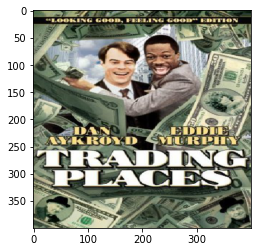

In [6]:
plt.imshow(X[2])

In [7]:
# Get X[2] corresponding genre
data['Genre'][2]

"['Comedy']"

In [8]:
# Get y value
y = np.array(data.drop(columns=['Id','Genre']).iloc[:2000])
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
y.shape

(2000, 25)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 198, 198, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 93, 93, 64)        5

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
25/25 [==============================] - 370s 14s/step - loss: 0.6433 - accuracy: 0.0417 - val_loss: 0.4717 - val_accuracy: 0.0750
Epoch 2/10
25/25 [==============================] - 357s 14s/step - loss: 0.4273 - accuracy: 0.1188 - val_loss: 0.3582 - val_accuracy: 0.3775
Epoch 3/10
25/25 [==============================] - 346s 14s/step - loss: 0.3415 - accuracy: 0.1888 - val_loss: 0.2775 - val_accuracy: 0.1975
Epoch 4/10
25/25 [==============================] - 374s 15s/step - loss: 0.3057 - accuracy: 0.2239 - val_loss: 0.2597 - val_accuracy: 0.1975
Epoch 5/10
25/25 [==============================] - 366s 15s/step - loss: 0.2931 - accuracy: 0.2401 - val_loss: 0.2557 - val_accuracy: 0.1975
Epoch 6/10
25/25 [==============================] - 350s 14s/step - loss: 0.2837 - accuracy: 0.2568 - val_loss: 0.2445 - val_accuracy: 0.1975
Epoch 7/10
25/25 [==============================] - 361s 15s/step - loss: 0.2785 - accuracy: 0.2319 - val_loss: 0.2532 - val_accuracy: 0.1975
Epoch 

In [14]:
prediction=model.predict(X_test)
prediction

array([[0.24068189, 0.13653502, 0.03415823, ..., 0.15771797, 0.03441972,
        0.02839234],
       [0.24108183, 0.14145565, 0.03673205, ..., 0.16412023, 0.03665748,
        0.03045195],
       [0.23918092, 0.13498503, 0.03323466, ..., 0.1555906 , 0.03327331,
        0.02745196],
       ...,
       [0.24242786, 0.14019674, 0.036035  , ..., 0.1625149 , 0.03629076,
        0.0299623 ],
       [0.24560872, 0.14274013, 0.03715941, ..., 0.1637455 , 0.03722683,
        0.03093046],
       [0.24084032, 0.13838089, 0.0346728 , ..., 0.15890345, 0.03449824,
        0.02887619]], dtype=float32)

In [15]:
# # flatten prediction into 1D
pre_flatten=prediction.flatten()
pre_flatten

array([0.24068189, 0.13653502, 0.03415823, ..., 0.15890345, 0.03449824,
       0.02887619], dtype=float32)

In [16]:
# # flatten y_test into 1D
test_flatten=y_test.flatten()
test_flatten

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
# # evaluate result:
from sklearn.metrics import accuracy_score
accuracy_score(test_flatten,pre_flatten.round())

0.9073

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_flatten,pre_flatten.round())

array([[8870,  197],
       [ 730,  203]], dtype=int64)

In [19]:
# Professor's path:
# path3='C:/SDTPGMS/WN2021AI/mmulti-label image classification/test image/test image1.jpg'

# my path as below:
path3='multi-label image classification/test image/test image1.jpg'

img = image.load_img(path3,target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(data.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
top_3

array([7, 4, 0], dtype=int64)

Drama (0.513)
Comedy (0.445)
Action (0.241)


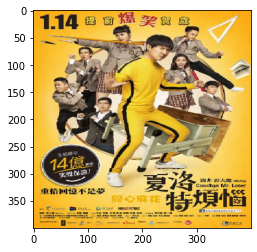

In [21]:
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)